**Demo for `teneva.func.demo.func_demo_schaffer`**

---

This module contains analytical Schaffer function for demo and tests.

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Class `FuncDemoSchaffer`

Schaffer function for demo and tests.

In [2]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoSchaffer(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         1.94756906 0.20262542 1.56950769]
0.0 1.5695076886237076


Minimum value:

In [3]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [4]:
func = teneva.FuncDemoSchaffer(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Schaffer
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 8.0090565e-04; x_min appr = [-0.020004 -0.020004]
y_max appr = 9.9754414e-01; x_max appr = [-1.54030806 -0.30006001]


We can plot the function for 2D case:

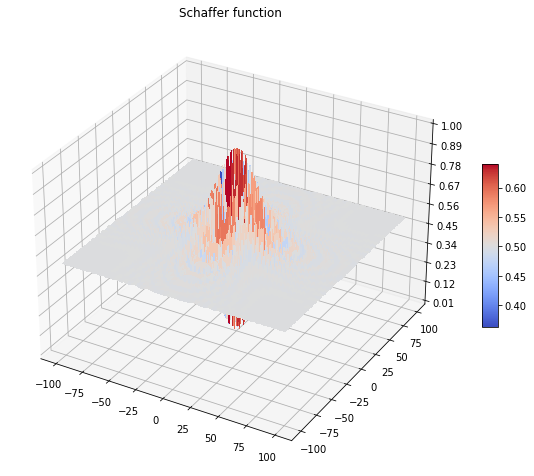

In [5]:
teneva.FuncDemoSchaffer(d=2).plot()

It is also possible to calculate the function in the PyTorch format:

In [6]:
func = teneva.FuncDemoSchaffer(d=10)

x1 = func.a + np.random.uniform(size=func.d) * (func.b - func.a)
y1 = func._calc(x1)

import torch
# torch.set_default_dtype(torch.float64)

x2 = torch.tensor(x1)
y2 = func._calc_pt(x2)

print(y1)
print(y2.numpy())

4.4610484539678605
4.46104845396786


---